In [160]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier


In [161]:
df = pd.read_csv("fetal_health.csv")
df_2 = pd.read_csv("fetal_health.csv")
df_3 = pd.read_csv("fetal_health.csv")

In [162]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [163]:
df.shape

(2126, 22)

In [164]:
df.dropna(inplace = True)

In [165]:
corr = df.corr()

<Axes: >

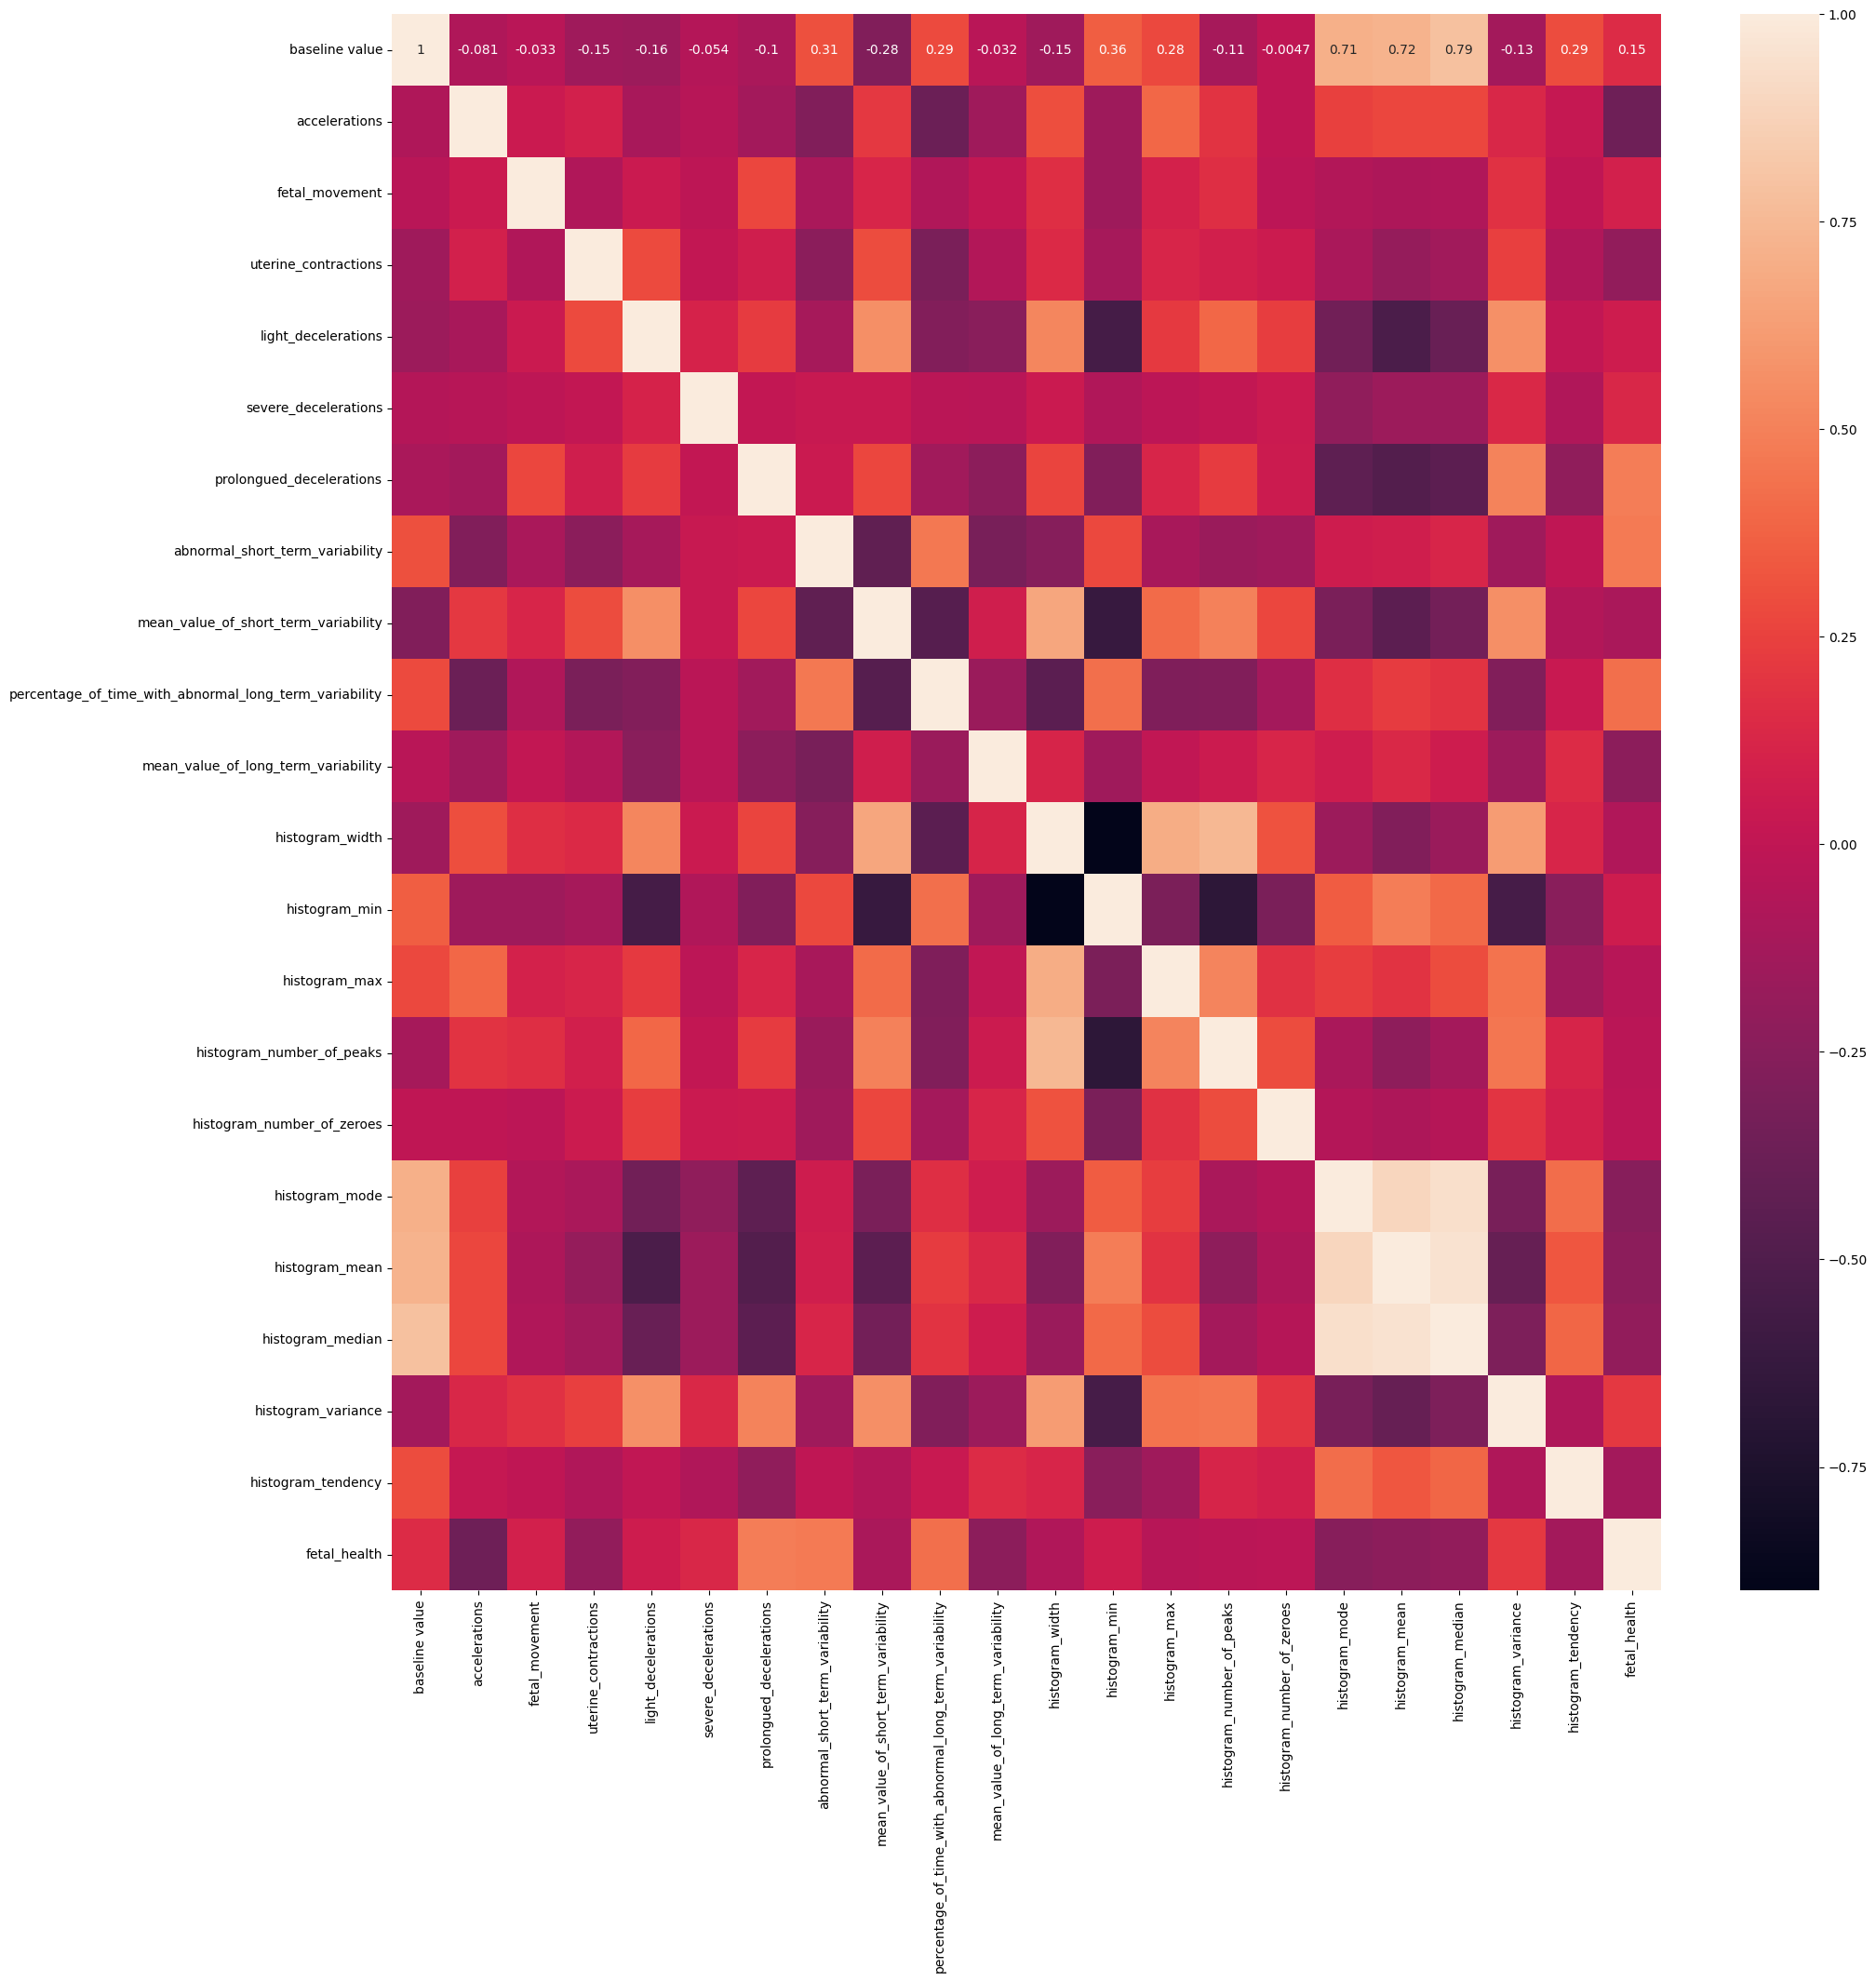

In [166]:
plt.figure(figsize = (22,22)) 
sns.heatmap(corr, annot = corr)

In [167]:
fetal_corr = df.corr()['fetal_health']

In [168]:
threshold = 0.1
threshold_2 = 0.2
threshold_3 = 0.3
weak_features_1 = fetal_corr[abs(fetal_corr) < threshold].index
weak_features_2 = fetal_corr[abs(fetal_corr) < threshold_2].index
weak_features_3 = fetal_corr[abs(fetal_corr) < threshold_3].index

In [169]:
df = df.drop(weak_features_1, axis = 1)

In [170]:
X = df.iloc[:, :-1]
print(X)

      baseline value  accelerations  uterine_contractions  \
0              120.0          0.000                 0.000   
1              132.0          0.006                 0.006   
2              133.0          0.003                 0.008   
3              134.0          0.003                 0.008   
4              132.0          0.007                 0.008   
...              ...            ...                   ...   
2121           140.0          0.000                 0.007   
2122           140.0          0.001                 0.007   
2123           140.0          0.001                 0.007   
2124           140.0          0.001                 0.006   
2125           142.0          0.002                 0.008   

      severe_decelerations  prolongued_decelerations  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                 

In [171]:
y = df.iloc[:, -1]
print(y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64


In [172]:
naive_total_acc = 0
naive_avg_acc = 0
for i  in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random.randint(0,100))
    model = GaussianNB()
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(classification_report(y_test,y_predict))
    print("Accuracy Score: ",accuracy_score(y_test, y_predict))
    naive_total_acc += accuracy_score(y_test, y_predict)
naive_avg_acc = naive_total_acc/10
print("Average Accuracy:", naive_avg_acc)

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       404
         2.0       0.51      0.86      0.64        77
         3.0       0.79      0.65      0.71        51

    accuracy                           0.84       532
   macro avg       0.76      0.79      0.76       532
weighted avg       0.89      0.84      0.86       532

Accuracy Score:  0.8439849624060151
              precision    recall  f1-score   support

         1.0       0.96      0.83      0.89       410
         2.0       0.48      0.82      0.61        72
         3.0       0.63      0.72      0.67        50

    accuracy                           0.82       532
   macro avg       0.69      0.79      0.72       532
weighted avg       0.86      0.82      0.83       532

Accuracy Score:  0.8157894736842105
              precision    recall  f1-score   support

         1.0       0.97      0.83      0.90       415
         2.0       0.53      0.85      0.65        81
   

In [173]:
threshold_1_accuracy_voting = []
threshold_2_accuracy_voting = []
threshold_3_accuracy_voting = []

In [174]:
voting_total_acc = 0
voting_avg_acc = 0
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
for i  in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random.randint(0,100))
    model = VotingClassifier(voting="hard",estimators = [("Rand_Forest", clf1), ("Decision_tree", clf2)])
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(classification_report(y_test,y_predict))
    print("Accuracy Score: ",accuracy_score(y_test, y_predict))
    voting_total_acc += accuracy_score(y_test, y_predict)
    threshold_1_accuracy_voting.append(accuracy_score(y_test, y_predict))
voting_avg_acc = voting_total_acc/10
print("Average Accuracy:", voting_avg_acc)


              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       422
         2.0       0.81      0.67      0.73        66
         3.0       0.95      0.84      0.89        44

    accuracy                           0.93       532
   macro avg       0.90      0.83      0.86       532
weighted avg       0.93      0.93      0.93       532

Accuracy Score:  0.9304511278195489
              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       403
         2.0       0.90      0.67      0.77        79
         3.0       0.96      0.86      0.91        50

    accuracy                           0.93       532
   macro avg       0.93      0.84      0.88       532
weighted avg       0.93      0.93      0.93       532

Accuracy Score:  0.9304511278195489
              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       404
         2.0       0.87      0.66      0.75        82
   

In [175]:
df_2 = df_2.drop(weak_features_2, axis = 1)
X_2 = df_2.iloc[:, :-1]
y_2 = df_2.iloc[:, -1]

In [176]:
voting_total_acc_2 = 0
voting_avg_acc_2 = 0
for i  in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.25, random_state = random.randint(0,100))
    model = VotingClassifier(voting="hard",estimators = [("Rand_Forest", clf1), ("Decision_tree", clf2)])
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(classification_report(y_test,y_predict))
    print("Accuracy Score: ",accuracy_score(y_test, y_predict))
    voting_total_acc_2 += accuracy_score(y_test, y_predict)
    threshold_2_accuracy_voting.append(accuracy_score(y_test, y_predict))
voting_avg_acc_2 = voting_total_acc_2/10
print("Average Accuracy:", voting_avg_acc_2)

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       418
         2.0       0.84      0.75      0.79        72
         3.0       0.95      0.88      0.91        42

    accuracy                           0.94       532
   macro avg       0.91      0.87      0.89       532
weighted avg       0.94      0.94      0.94       532

Accuracy Score:  0.9379699248120301
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       418
         2.0       0.81      0.73      0.77        60
         3.0       0.98      0.78      0.87        54

    accuracy                           0.94       532
   macro avg       0.91      0.83      0.87       532
weighted avg       0.94      0.94      0.94       532

Accuracy Score:  0.9398496240601504
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       422
         2.0       0.80      0.75      0.77        71
   

In [177]:
df_3 = df_3.drop(weak_features_3, axis = 1)
X_3 = df_3.iloc[:, :-1]
y_3 = df_3.iloc[:, -1]

In [178]:
voting_total_acc_3 = 0
voting_avg_acc_3 = 0
for i  in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.25, random_state = random.randint(0,100))
    model = VotingClassifier(voting="hard",estimators = [("Rand_Forest", clf1), ("Decision_tree", clf2)])
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(classification_report(y_test,y_predict))
    print("Accuracy Score: ",accuracy_score(y_test, y_predict))
    voting_total_acc_3 += accuracy_score(y_test, y_predict)
    threshold_3_accuracy_voting.append(accuracy_score(y_test, y_predict))
voting_avg_acc_3 = voting_total_acc_3/10
print("Average Accuracy:", voting_avg_acc_3)

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       416
         2.0       0.78      0.68      0.72        74
         3.0       0.92      0.81      0.86        42

    accuracy                           0.91       532
   macro avg       0.88      0.81      0.84       532
weighted avg       0.91      0.91      0.91       532

Accuracy Score:  0.9078947368421053
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       417
         2.0       0.82      0.74      0.78        68
         3.0       0.93      0.79      0.85        47

    accuracy                           0.92       532
   macro avg       0.89      0.83      0.86       532
weighted avg       0.92      0.92      0.92       532

Accuracy Score:  0.9229323308270677
              precision    recall  f1-score   support

         1.0       0.90      0.95      0.92       415
         2.0       0.67      0.53      0.59        76
   

In [179]:
print(threshold_1_accuracy_voting)

[0.9304511278195489, 0.9304511278195489, 0.924812030075188, 0.9454887218045113, 0.9398496240601504, 0.924812030075188, 0.9379699248120301, 0.9360902255639098, 0.9342105263157895, 0.9154135338345865]


In [180]:
print(threshold_2_accuracy_voting)

[0.9379699248120301, 0.9398496240601504, 0.9342105263157895, 0.9191729323308271, 0.9398496240601504, 0.943609022556391, 0.9398496240601504, 0.9229323308270677, 0.9323308270676691, 0.943609022556391]


In [181]:
print(threshold_3_accuracy_voting)

[0.9078947368421053, 0.9229323308270677, 0.8721804511278195, 0.8947368421052632, 0.9285714285714286, 0.9022556390977443, 0.900375939849624, 0.8947368421052632, 0.8909774436090225, 0.8834586466165414]


In [182]:
iterations = np.arange(1, len(threshold_1_accuracy_voting) + 1)

<function matplotlib.pyplot.show(close=None, block=None)>

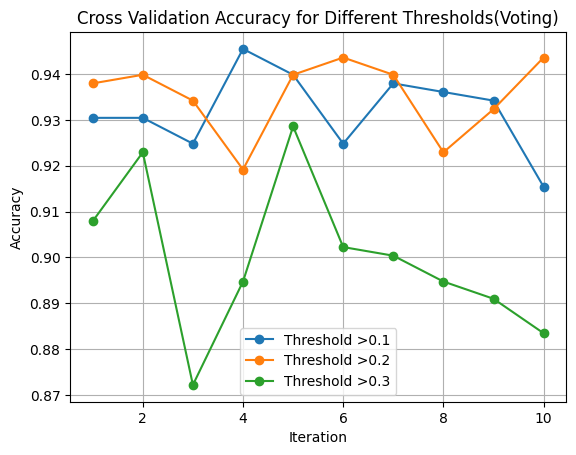

In [185]:
plt.plot(iterations, threshold_1_accuracy_voting, marker='o', label='Threshold >0.1')
plt.plot(iterations, threshold_2_accuracy_voting, marker='o', label='Threshold >0.2')
plt.plot(iterations, threshold_3_accuracy_voting, marker='o', label='Threshold >0.3')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy for Different Thresholds(Voting)')
plt.legend()
plt.grid(True)
plt.show